# Benchmark PySpark vs PyThoth

## Generating Dataset

In [1]:
import random

small_list = [random.randint(1, 100) for _ in range(50)]
medium_list = [random.randint(1, 100) for _ in range(5000)]
large_list = [random.randint(1, 100) for _ in range(500000)]
extra_large_list = [random.randint(1, 100) for _ in range(5000000)]

# PySpark Benchmark

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import time

In [3]:
#192.168.122.217    spark-master

MASTER_IP = "spark-master"

spark = (
    SparkSession.builder.appName("Thoth Benchmark")
    .master(f"spark://{MASTER_IP}:7077")
    # .config("spark.executor.memory", "1g")
    # .config("spark.driver.memory", "1g")
    .getOrCreate()
)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/02 11:53:42 WARN Utils: Your hostname, akm, resolves to a loopback address: 127.0.1.1; using 192.168.1.5 instead (on interface enp3s0)
25/10/02 11:53:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/02 11:53:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


#### Average Calculations

In [4]:
start_time = time.time()
small_df = spark.createDataFrame(small_list, "int").toDF("value")
small_df.agg(avg("value")).show()
end_time = time.time()
py_spark_avg_small_list_time = end_time - start_time
print(f"\nSpark Time taken to process small DataFrame: {py_spark_avg_small_list_time} seconds")

start_time = time.time()
medium_df = spark.createDataFrame(medium_list, "int").toDF("value")
medium_df.agg(avg("value")).show()
end_time = time.time()
py_spark_avg_medium_list_time = end_time - start_time
print(f"\nSpark Time taken to process medium DataFrame: {py_spark_avg_medium_list_time} seconds")

start_time = time.time()
large_df = spark.createDataFrame(large_list, "int").toDF("value")
large_df.agg(avg("value")).show()
end_time = time.time()
py_spark_avg_large_list_time = end_time - start_time
print(f"\nSpark Time taken to process large DataFrame: {py_spark_avg_large_list_time} seconds")

start_time = time.time()
extra_large_list_df = spark.createDataFrame(extra_large_list, "int").toDF("value")
extra_large_list_df.agg(avg("value")).show()
end_time = time.time()
py_spark_avg_extra_large_list_time = end_time - start_time
print(f"\nSpark Time taken to process extra large DataFrame: {py_spark_avg_extra_large_list_time} seconds")

+----------+
|avg(value)|
+----------+
|     52.88|
+----------+


Spark Time taken to process small DataFrame: 3.6134068965911865 seconds
+----------+
|avg(value)|
+----------+
|     51.01|
+----------+


Spark Time taken to process medium DataFrame: 0.22846388816833496 seconds
+----------+
|avg(value)|
+----------+
| 50.516244|
+----------+


Spark Time taken to process large DataFrame: 0.7520158290863037 seconds


25/10/02 11:53:54 WARN TaskSetManager: Stage 9 contains a task of very large size (6561 KiB). The maximum recommended task size is 1000 KiB.


+----------+
|avg(value)|
+----------+
| 50.501568|
+----------+


Spark Time taken to process extra large DataFrame: 4.251583814620972 seconds


### Min Max Calculations

In [5]:
from pyspark.sql.functions import min as spark_min, max as spark_max

# Small list min timing
start_time = time.time()
small_min = small_df.agg(spark_min("value").alias("min")).collect()[0]['min']
end_time = time.time()
py_spark_small_min_time = end_time - start_time
print(f"Small List - Min: {small_min}")
print(f"Spark Time taken for small min: {py_spark_small_min_time} seconds")

# Small list max timing
start_time = time.time()
small_max = small_df.agg(spark_max("value").alias("max")).collect()[0]['max']
end_time = time.time()
py_spark_small_max_time = end_time - start_time
print(f"Small List - Max: {small_max}")
print(f"Spark Time taken for small max: {py_spark_small_max_time} seconds")

# Medium list min timing
start_time = time.time()
medium_min = medium_df.agg(spark_min("value").alias("min")).collect()[0]['min']
end_time = time.time()
py_spark_medium_min_time = end_time - start_time
print(f"Medium List - Min: {medium_min}")
print(f"Spark Time taken for medium min: {py_spark_medium_min_time} seconds")

# Medium list max timing
start_time = time.time()
medium_max = medium_df.agg(spark_max("value").alias("max")).collect()[0]['max']
end_time = time.time()
py_spark_medium_max_time = end_time - start_time
print(f"Medium List - Max: {medium_max}")
print(f"Spark Time taken for medium max: {py_spark_medium_max_time} seconds")

# Large list min timing
start_time = time.time()
large_min = large_df.agg(spark_min("value").alias("min")).collect()[0]['min']
end_time = time.time()
py_spark_large_min_time = end_time - start_time
print(f"Large List - Min: {large_min}")
print(f"Spark Time taken for large min: {py_spark_large_min_time} seconds")

# Large list max timing
start_time = time.time()
large_max = large_df.agg(spark_max("value").alias("max")).collect()[0]['max']
end_time = time.time()
py_spark_large_max_time = end_time - start_time
print(f"Large List - Max: {large_max}")
print(f"Spark Time taken for large max: {py_spark_large_max_time} seconds")

# Extra large list min timing
start_time = time.time()
extra_large_min = extra_large_list_df.agg(spark_min("value").alias("min")).collect()[0]['min']
end_time = time.time()
py_spark_extra_large_min_time = end_time - start_time
print(f"Extra Large List - Min: {extra_large_min}")
print(f"Spark Time taken for extra large min: {py_spark_extra_large_min_time} seconds")

# Extra large list max timing
start_time = time.time()
extra_large_max = extra_large_list_df.agg(spark_max("value").alias("max")).collect()[0]['max']
end_time = time.time()
py_spark_extra_large_max_time = end_time - start_time
print(f"Extra Large List - Max: {extra_large_max}")
print(f"Spark Time taken for extra large max: {py_spark_extra_large_max_time} seconds")

Small List - Min: 1
Spark Time taken for small min: 0.2388293743133545 seconds
Small List - Max: 99
Spark Time taken for small max: 0.21655750274658203 seconds
Medium List - Min: 1
Spark Time taken for medium min: 0.17552590370178223 seconds
Medium List - Max: 100
Spark Time taken for medium max: 0.19069910049438477 seconds
Large List - Min: 1
Spark Time taken for large min: 0.256298303604126 seconds
Large List - Max: 100
Spark Time taken for large max: 0.2435319423675537 seconds


25/10/02 11:53:56 WARN TaskSetManager: Stage 30 contains a task of very large size (6561 KiB). The maximum recommended task size is 1000 KiB.
25/10/02 11:53:57 WARN TaskSetManager: Stage 33 contains a task of very large size (6561 KiB). The maximum recommended task size is 1000 KiB.


Extra Large List - Min: 1
Spark Time taken for extra large min: 0.9968793392181396 seconds


Extra Large List - Max: 100
Spark Time taken for extra large max: 0.9405603408813477 seconds


### Sorting Calculations

In [ ]:
from pyspark.sql.functions import asc

# Sort small_df in ascending order
start_time = time.time()
small_sorted_asc = small_df.orderBy(asc("value"))
small_sorted_asc.show()
end_time = time.time()
py_spark_small_sort_asc_time = end_time - start_time
print(f"Spark Time taken to sort small list ascending: {py_spark_small_sort_asc_time} seconds")

# Sort medium_df in ascending order
start_time = time.time()
medium_sorted_asc = medium_df.orderBy(asc("value"))
medium_sorted_asc.show()
end_time = time.time()
py_spark_medium_sort_asc_time = end_time - start_time
print(f"Spark Time taken to sort medium list ascending: {py_spark_medium_sort_asc_time} seconds")

# Sort large_df in ascending order
start_time = time.time()
large_sorted_asc = large_df.orderBy(asc("value"))
large_sorted_asc.show()
end_time = time.time()
py_spark_large_sort_asc_time = end_time - start_time
print(f"Spark Time taken to sort large list ascending: {py_spark_large_sort_asc_time} seconds")

# Sort extra_large_list_df in ascending order
start_time = time.time()
extra_large_sorted_asc = extra_large_list_df.orderBy(asc("value"))
extra_large_sorted_asc.show()
end_time = time.time()
py_spark_extra_large_sort_asc_time = end_time - start_time
print(f"Spark Time taken to sort extra large list ascending: {py_spark_extra_large_sort_asc_time} seconds")

+-----+
|value|
+-----+
|    1|
|    4|
|    5|
|    9|
|   13|
|   15|
|   16|
|   16|
|   18|
|   20|
|   22|
|   23|
|   30|
|   31|
|   32|
|   33|
|   33|
|   43|
|   43|
|   47|
+-----+
only showing top 20 rows
Spark Time taken to sort small list ascending: 0.24784493446350098 seconds
+-----+
|value|
+-----+
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
+-----+
only showing top 20 rows
Spark Time taken to sort medium list ascending: 0.13184404373168945 seconds
+-----+
|value|
+-----+
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
+-----+
only showing top 20 rows
Spark Time taken to sort large list ascending: 0.2123560905456543 seconds


25/10/02 11:53:59 WARN TaskSetManager: Stage 39 contains a task of very large size (6561 KiB). The maximum recommended task size is 1000 KiB.


+-----+
|value|
+-----+
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
+-----+
only showing top 20 rows
Spark Time taken to sort extra large list ascending: 0.8405840396881104 seconds


25/10/02 11:55:28 WARN StandaloneAppClient$ClientEndpoint: Connection to 192.168.122.217:7077 failed; waiting for master to reconnect...
25/10/02 11:55:28 WARN StandaloneSchedulerBackend: Disconnected from Spark cluster! Waiting for reconnection...
25/10/02 11:55:32 ERROR TaskSchedulerImpl: Lost executor 0 on 0.0.0.0: Remote RPC client disassociated. Likely due to containers exceeding thresholds, or network issues. Check driver logs for WARN messages.


# Thoth BenchMark

In [7]:
from py_thoth.operations.vector import list_average
from py_thoth.settings.connections import change_remote_address
remote_addresses = ["192.168.122.217:50051", "192.168.122.215:50051"]
# remote_addresses = ["localhost:50051", "localhost:50052"]
# remote_addresses = ["localhost:50051"]
change_remote_address(remote_addresses)


Remote address changed to: ['192.168.122.217:50051', '192.168.122.215:50051']


### Average Calculations

In [8]:
start_time = time.time()
print("Average Small List: ", list_average(small_list))
end_time = time.time()
thoth_small_list_time = end_time - start_time
print(f"\nThoth Small List Time taken: {thoth_small_list_time} seconds")

start_time = time.time()
print("Average Medium List: ", list_average(medium_list))
end_time = time.time()
thoth_medium_list_time = end_time - start_time
print(f"\nThoth Medium List Time taken: {thoth_medium_list_time} seconds")

start_time = time.time()
print("Average Large List: ", list_average(large_list))
end_time = time.time()
thoth_large_list_time = end_time - start_time
print(f"\nThoth Large List Time taken: {thoth_large_list_time} seconds")

start_time = time.time()
print("Average Extra Large List: ", list_average(extra_large_list))
end_time = time.time()
thoth_extra_large_list_time = end_time - start_time
print(f"\nThoth Extra Large Time taken: {thoth_extra_large_list_time} seconds")


Average Small List:  52.88

Thoth Small List Time taken: 0.024153470993041992 seconds
Average Medium List:  51.01

Thoth Medium List Time taken: 0.011679410934448242 seconds
Average Large List:  50.516244

Thoth Large List Time taken: 0.16014671325683594 seconds
Average Extra Large List:  50.501568

Thoth Extra Large Time taken: 1.455040454864502 seconds


### Min Max, Sorting Calculations

In [9]:
from py_thoth.operations.vector import sort_list, max_list, min_list

# Measure min time
start_time = time.time()
thoth_small_min = min_list(small_list)
end_time = time.time()
thoth_small_min_time = end_time - start_time
print(f"Small List - Min (Thoth): {thoth_small_min}")
print(f"Thoth Time taken for small min: {thoth_small_min_time} seconds")

start_time = time.time()
thoth_medium_min = min_list(medium_list)
end_time = time.time()
thoth_medium_min_time = end_time - start_time
print(f"Medium List - Min (Thoth): {thoth_medium_min}")
print(f"Thoth Time taken for medium min: {thoth_medium_min_time} seconds")

start_time = time.time()
thoth_large_min = min_list(large_list)
end_time = time.time()
thoth_large_min_time = end_time - start_time
print(f"Large List - Min (Thoth): {thoth_large_min}")
print(f"Thoth Time taken for large min: {thoth_large_min_time} seconds")

start_time = time.time()
thoth_extra_large_min = min_list(extra_large_list)
end_time = time.time()
thoth_extra_large_min_time = end_time - start_time
print(f"Extra Large List - Min (Thoth): {thoth_extra_large_min}")
print(f"Thoth Time taken for extra large min: {thoth_extra_large_min_time} seconds")

# Measure max time
start_time = time.time()
thoth_small_max = max_list(small_list)
end_time = time.time()
thoth_small_max_time = end_time - start_time
print(f"Small List - Max (Thoth): {thoth_small_max}")
print(f"Thoth Time taken for small max: {thoth_small_max_time} seconds")

start_time = time.time()
thoth_medium_max = max_list(medium_list)
end_time = time.time()
thoth_medium_max_time = end_time - start_time
print(f"Medium List - Max (Thoth): {thoth_medium_max}")
print(f"Thoth Time taken for medium max: {thoth_medium_max_time} seconds")

start_time = time.time()
thoth_large_max = max_list(large_list)
end_time = time.time()
thoth_large_max_time = end_time - start_time
print(f"Large List - Max (Thoth): {thoth_large_max}")
print(f"Thoth Time taken for large max: {thoth_large_max_time} seconds")

start_time = time.time()
thoth_extra_large_max = max_list(extra_large_list)
end_time = time.time()
thoth_extra_large_max_time = end_time - start_time
print(f"Extra Large List - Max (Thoth): {thoth_extra_large_max}")
print(f"Thoth Time taken for extra large max: {thoth_extra_large_max_time} seconds")

# Measure sort time (ascending)
start_time = time.time()
thoth_small_sorted_asc = sort_list(small_list, ascending=True)
end_time = time.time()
thoth_small_sort_asc_time = end_time - start_time
print(f"Small List - Sorted Ascending (Thoth): {thoth_small_sorted_asc[:10]} ...")
print(f"Thoth Time taken to sort small list ascending: {thoth_small_sort_asc_time} seconds")

start_time = time.time()
thoth_medium_sorted_asc = sort_list(medium_list, ascending=True)
end_time = time.time()
thoth_medium_sort_asc_time = end_time - start_time
print(f"Medium List - Sorted Ascending (Thoth): {thoth_medium_sorted_asc[:10]} ...")
print(f"Thoth Time taken to sort medium list ascending: {thoth_medium_sort_asc_time} seconds")

start_time = time.time()
thoth_large_sorted_asc = sort_list(large_list, ascending=True)
end_time = time.time()
thoth_large_sort_asc_time = end_time - start_time
print(f"Large List - Sorted Ascending (Thoth): {thoth_large_sorted_asc[:10]} ...")
print(f"Thoth Time taken to sort large list ascending: {thoth_large_sort_asc_time} seconds")

start_time = time.time()
thoth_extra_large_sorted_asc = sort_list(extra_large_list, ascending=True)
end_time = time.time()
thoth_extra_large_sort_asc_time = end_time - start_time
print(f"Extra Large List - Sorted Ascending (Thoth): {thoth_extra_large_sorted_asc[:10]} ...")
print(f"Thoth Time taken to sort extra large list ascending: {thoth_extra_large_sort_asc_time} seconds")

Small List - Min (Thoth): 1.0
Thoth Time taken for small min: 0.007719278335571289 seconds
Medium List - Min (Thoth): 1.0
Thoth Time taken for medium min: 0.005296468734741211 seconds
Large List - Min (Thoth): 1.0
Thoth Time taken for large min: 0.1070716381072998 seconds
Extra Large List - Min (Thoth): 1.0
Thoth Time taken for extra large min: 1.1548106670379639 seconds
Small List - Max (Thoth): 99.0
Thoth Time taken for small max: 0.005494594573974609 seconds
Medium List - Max (Thoth): 100.0
Thoth Time taken for medium max: 0.0046901702880859375 seconds
Large List - Max (Thoth): 100.0
Thoth Time taken for large max: 0.10961055755615234 seconds
Extra Large List - Max (Thoth): 100.0
Thoth Time taken for extra large max: 1.4357032775878906 seconds
Small List - Sorted Ascending (Thoth): [1.0, 4.0, 5.0, 9.0, 15.0, 16.0, 20.0, 22.0, 23.0, 33.0] ...
Thoth Time taken to sort small list ascending: 0.00639796257019043 seconds
Medium List - Sorted Ascending (Thoth): [1.0, 1.0, 1.0, 1.0, 1.0, 1.

## Plotting Results

In [10]:
import pandas as pd

comparison_data = {
    "Dataset": [
        f"Small ({len(small_list):,})",
        f"Medium ({len(medium_list):,})",
        f"Large ({len(large_list):,})",
        f"Extra Large ({len(extra_large_list):,})"
    ],
    "Thoth Avg Time (s)": [
        thoth_small_list_time,
        thoth_medium_list_time,
        thoth_large_list_time,
        thoth_extra_large_list_time
    ],
    "PySpark Avg Time (s)": [
        py_spark_avg_small_list_time,
        py_spark_avg_medium_list_time,
        py_spark_avg_large_list_time,
        py_spark_avg_extra_large_list_time
    ],
    "Thoth Min Time (s)": [
        thoth_small_min_time,
        thoth_medium_min_time,
        thoth_large_min_time,
        thoth_extra_large_min_time
    ],
    "PySpark Min Time (s)": [
        py_spark_small_min_time,
        py_spark_medium_min_time,
        py_spark_large_min_time,
        py_spark_extra_large_min_time
    ],
    "Thoth Max Time (s)": [
        thoth_small_max_time,
        thoth_medium_max_time,
        thoth_large_max_time,
        thoth_extra_large_max_time
    ],
    "PySpark Max Time (s)": [
        py_spark_small_max_time,
        py_spark_medium_max_time,
        py_spark_large_max_time,
        py_spark_extra_large_max_time
    ],
    "Thoth Sort Asc Time (s)": [
        thoth_small_sort_asc_time,
        thoth_medium_sort_asc_time,
        thoth_large_sort_asc_time,
        thoth_extra_large_sort_asc_time
    ],
    "PySpark Sort Asc Time (s)": [
        py_spark_small_sort_asc_time,
        py_spark_medium_sort_asc_time,
        py_spark_large_sort_asc_time,
        py_spark_extra_large_sort_asc_time
    ]
}

df_comparison = pd.DataFrame(comparison_data)

print(df_comparison)

                   Dataset  Thoth Avg Time (s)  PySpark Avg Time (s)  \
0               Small (50)            0.024153              3.613407   
1           Medium (5,000)            0.011679              0.228464   
2          Large (500,000)            0.160147              0.752016   
3  Extra Large (5,000,000)            1.455040              4.251584   

   Thoth Min Time (s)  PySpark Min Time (s)  Thoth Max Time (s)  \
0            0.007719              0.238829            0.005495   
1            0.005296              0.175526            0.004690   
2            0.107072              0.256298            0.109611   
3            1.154811              0.996879            1.435703   

   PySpark Max Time (s)  Thoth Sort Asc Time (s)  PySpark Sort Asc Time (s)  
0              0.216558                 0.006398                   0.247845  
1              0.190699                 0.006852                   0.131844  
2              0.243532                 0.181601                   0.

In [12]:
import os

OUTPUT_DIR = "assets"
df_comparison.to_csv(os.path.join(OUTPUT_DIR, "thoth_vs_pyspark_benchmark.csv"), index=False) 

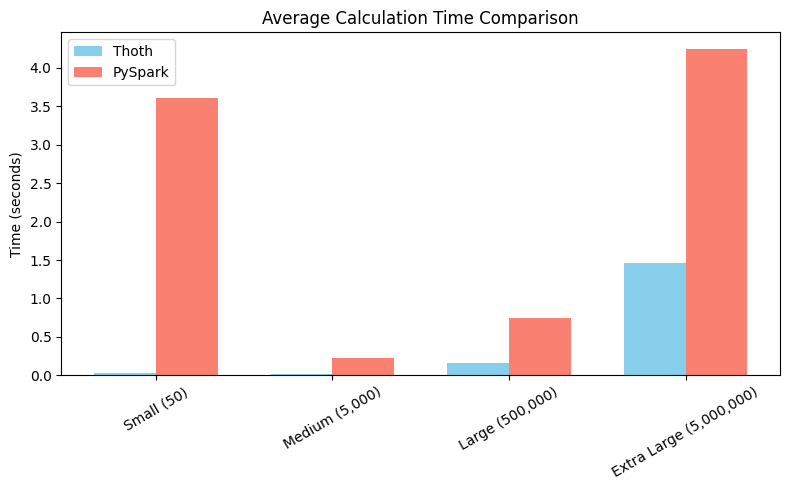

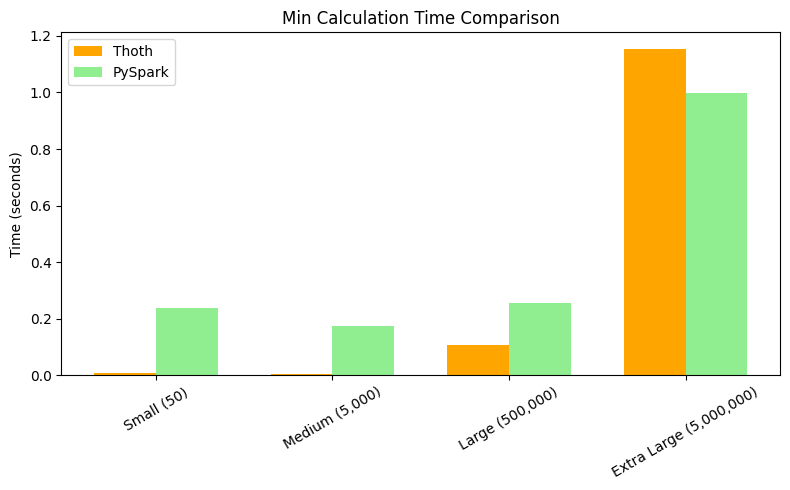

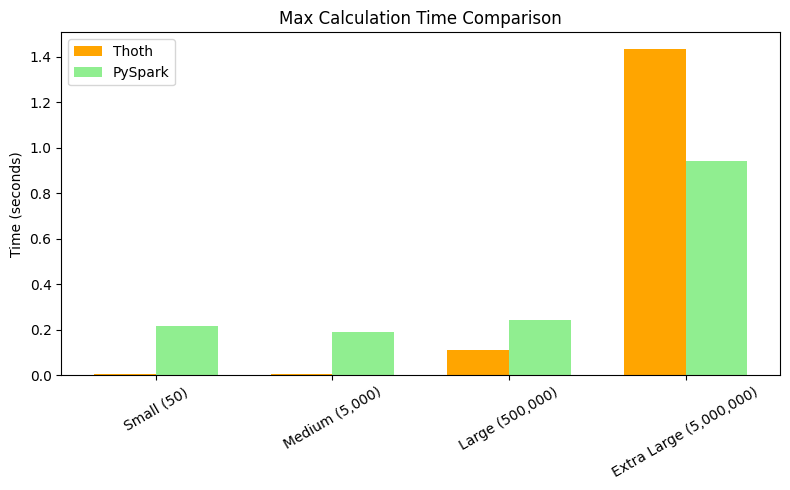

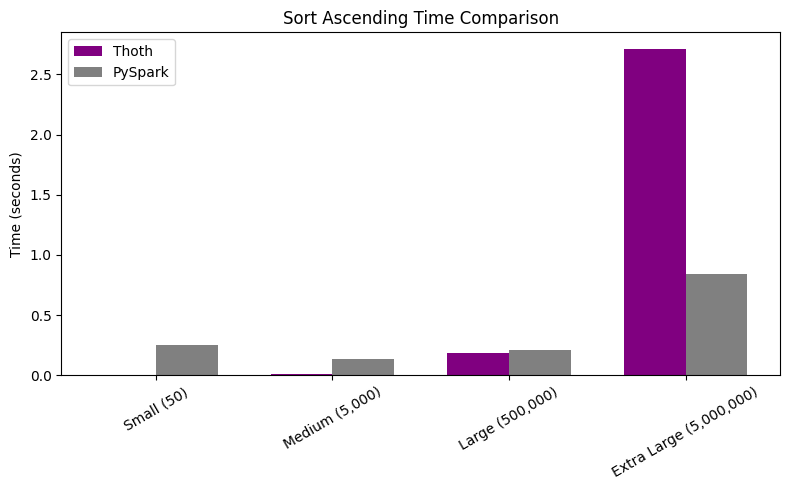

In [13]:
import numpy as np

import matplotlib.pyplot as plt

datasets = df_comparison["Dataset"]
x = np.arange(len(datasets))  # the label locations
width = 0.35  # the width of the bars

# 1. Average Time Comparison
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, df_comparison["Thoth Avg Time (s)"], width, label='Thoth', color='skyblue')
plt.bar(x + width/2, df_comparison["PySpark Avg Time (s)"], width, label='PySpark', color='salmon')
plt.xticks(x, datasets, rotation=30)
plt.ylabel('Time (seconds)')
plt.title('Average Calculation Time Comparison')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "avg_time_comparison.png"))
plt.show()

# 2. Min Time Comparison
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, df_comparison["Thoth Min Time (s)"], width, label='Thoth', color='orange')
plt.bar(x + width/2, df_comparison["PySpark Min Time (s)"], width, label='PySpark', color='lightgreen')
plt.xticks(x, datasets, rotation=30)
plt.ylabel('Time (seconds)')
plt.title('Min Calculation Time Comparison')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "min_time_comparison.png"))
plt.show()

# 3. Max Time Comparison
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, df_comparison["Thoth Max Time (s)"], width, label='Thoth', color='orange')
plt.bar(x + width/2, df_comparison["PySpark Max Time (s)"], width, label='PySpark', color='lightgreen')
plt.xticks(x, datasets, rotation=30)
plt.ylabel('Time (seconds)')
plt.title('Max Calculation Time Comparison')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "max_time_comparison.png"))
plt.show()

# 4. Sort Ascending Time Comparison
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, df_comparison["Thoth Sort Asc Time (s)"], width, label='Thoth', color='purple')
plt.bar(x + width/2, df_comparison["PySpark Sort Asc Time (s)"], width, label='PySpark', color='gray')
plt.xticks(x, datasets, rotation=30)
plt.ylabel('Time (seconds)')
plt.title('Sort Ascending Time Comparison')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "sort_asc_time_comparison.png"))
plt.show()